# Metadata 

```yaml
Course:    DS 5001 
Module:    10 Lab
Topic:     Import General Inquirer Sentiment Lexicon
Author:    R.C. Alvarado
Date:      02 April 2023 (revised)
```

**Purpose:**
* Convert [General Inquirer lexicon](http://www.wjh.harvard.edu/~inquirer/spreadsheet_guide.htm) into usable form. 
* Download [the spreadsheet](http://www.wjh.harvard.edu/~inquirer/inquirerbasic.xls).
* May have to install `xlrd` 

## Setting Up

In [1]:
data_in = "../data"

In [2]:
import pandas as pd
import numpy as np

## Import GI Excel file 

It has 182 ontology/sentiment columns

In [3]:
df = pd.read_excel(f'{data_in}/lexicons/sources/inquirerbasic.xls', false_values=None)

In [4]:
df.sample(10)

,Entry,Source,Positiv,Negativ,Pstv,Affil,Ngtv,Hostile,Strong,Power,...,Anomie,NegAff,PosAff,SureLw,If,NotLw,TimeSpc,FormLw,Othtags,Defined
6293,MAGNIFICENCE,H4,Positiv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Noun,|
2260,CONTENTMENT,H4,Positiv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Noun,|
11277,VIEWER,H4Lvd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Noun,|
11405,WATCH#3,H4Lvd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,TimeSpc,NaN,Noun,| 3% noun: A timepiece
6797,MULTILATERAL-FORCE,Lvd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Noun POLIT ECON COLL SUPRAS,NaN
4568,GLAD#2,H4Lvd,Positiv,NaN,Pstv,Affil,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LY,"| 4% adv: ""Gladly""--with pleasure"
6673,MISUNDERSTAND,H4Lvd,NaN,Negativ,NaN,NaN,Ngtv,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUPV,|
7323,OVERRIDE,Lvd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUPV,NaN
8331,READER,H4Lvd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Noun,| noun: A person (or machine) who reads
10368,TAX#4,H4Lvd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FormLw,Noun,"| 10% noun-idiom: ""Social security tax"""


## Handle variant terms 

In [5]:
df['split'] = df.Entry.str.split(r'[#_]+')

In [6]:
# Function to add 1 to terms without variants
def add_1(x):
    try:
        if len(x) == 1:
            x = x + ['1']
    except:
        print(x)
        x = 0
    return x

In [7]:
df['split'] = df['split'].apply(add_1)
df['term_str'] = df['split'].apply(lambda x: x[0].lower(), 1)
df['term_var'] = df['split'].apply(lambda x: x[1], 1)
df = df.set_index(['term_str', 'term_var'])

<AxesSubplot: >

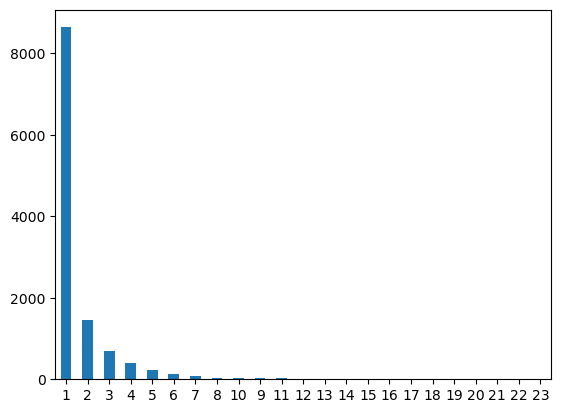

In [24]:
df.reset_index().term_var.value_counts().plot.bar(rot=0)

In [9]:
df.sample(10)

,,Entry,Source,Positiv,Negativ,Pstv,Affil,Ngtv,Hostile,Strong,Power,...,NegAff,PosAff,SureLw,If,NotLw,TimeSpc,FormLw,Othtags,Defined,split
term_str,term_var,,,,,,,,,,,,,,,,,,,,,
slanderer,1,SLANDERER,H4Lvd,NaN,Negativ,NaN,NaN,Ngtv,Hostile,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Noun,|,"[SLANDERER, 1]"
present,1,PRESENT#1,H4Lvd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,TimeSpc,NaN,Modif,"| 39% adj: Current, near in time--""the present...","[PRESENT, 1]"
sail,2,SAIL#2,H4Lvd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUPV,|,"[SAIL, 2]"
breath,1,BREATH#1,H4Lvd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Noun,|,"[BREATH, 1]"
grave,5,GRAVE#5,H4Lvd,NaN,Negativ,NaN,NaN,Ngtv,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Modif,"| 0% adjective: ""Gravest""--most serious","[GRAVE, 5]"
brand,2,BRAND#2,H4Lvd,NaN,NaN,NaN,NaN,NaN,Hostile,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUPV,|,"[BRAND, 2]"
cereal,1,CEREAL,H4Lvd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Noun,|,"[CEREAL, 1]"
worldly,1,WORLDLY,H4Lvd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LY,|,"[WORLDLY, 1]"
cadillac,1,CADILLAC,H4Lvd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Noun,|,"[CADILLAC, 1]"


## Convert column values to numbers

In [10]:
df = df.sort_index()

In [11]:
try:
    df.loc[df.Positiv == 'Positiv', 'polarity'] = 1
    df.loc[df.Negativ == 'Negativ', 'polarity'] = -1
    df['polarity'] = df['polarity'].fillna(0).astype('int')
except TypeError as e:
    print(e, "--  This means you are re-running the script with values that have already been set.")

In [12]:
df.polarity.sample(10)

term_str       term_var
disadvantage   1          -1
novice         1          -1
murky          1          -1
steam          1           0
differentiate  1           0
dish           1           0
shrivel        1          -1
adherence      1           1
vindication    1           0
hallowed       1           1
Name: polarity, dtype: int64

In [13]:
VALCOLS = df.columns[2:-4]

In [14]:
df[VALCOLS] = df[VALCOLS].fillna(0).astype('bool').astype('int')

In [15]:
df.loc['love', VALCOLS]#.stack().sort_values(ascending=False)

,Positiv,Negativ,Pstv,Affil,Ngtv,Hostile,Strong,Power,Weak,Submit,...,PtLw,Nation,Anomie,NegAff,PosAff,SureLw,If,NotLw,TimeSpc,FormLw
term_var,,,,,,,,,,,,,,,,,,,,,
1,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Take and combine only sentiment 

In [16]:
sents = df.query("Positiv > 0 | Negativ > 0").copy()

In [17]:
sents['sentiment'] =  sents.Positiv  - sents.Negativ

In [18]:
sents['sentiment'].sample(5)

term_str  term_var
meddle    1          -1
amply     1           1
patient   2           1
tact      1           1
hurt      2          -1
Name: sentiment, dtype: int64

### Take average of variants

In [19]:
GI = sents.groupby('term_str').sentiment.mean()

### Snap values to -1, 0, or 1

In [20]:
GI = np.sign(GI).astype('int').to_frame()

In [21]:
GI.shape

(3626, 1)

In [22]:
GI.sample(10)

,sentiment
term_str,
permission,1
shrill,-1
mistake,-1
revel,1
darn,-1
bout,-1
allowable,1
tempest,-1
ruthlessness,-1


## Save

In [23]:
GI.to_csv(data_in + '/lexicons/sources/gi.csv')